In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from matplotlib.colors import ListedColormap
import seaborn as sns

In [2]:
#%%
# Importing data and creating a dataframe
df = pd.read_csv('data/user-data.csv')

# Encode the gender column
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1})

# Display the first few rows and data types
display(df.head())
display(df.dtypes)

,user_id,gender,age,estimated_salary,purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0


user_id             int64
gender              int64
age                 int64
estimated_salary    int64
purchased           int64
dtype: object

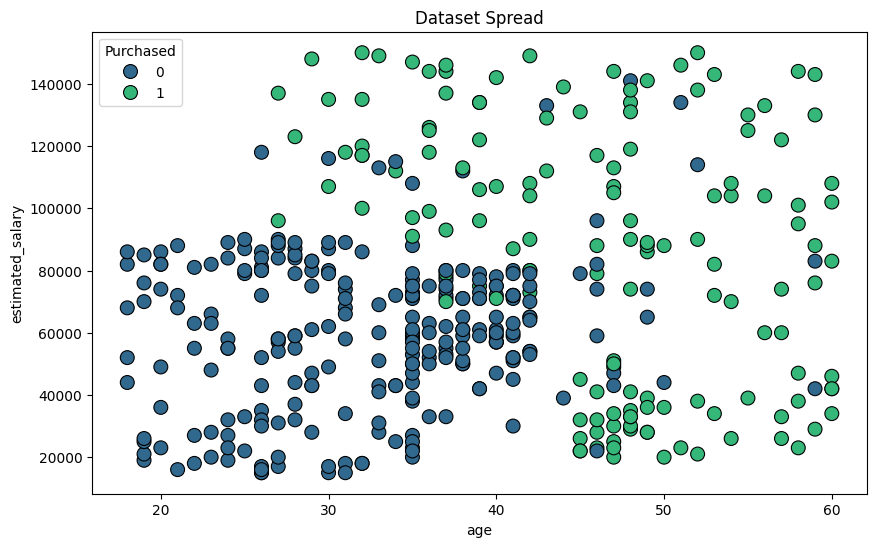

In [3]:

# Plotting the scatter plot using seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='age', y='estimated_salary', hue='purchased', palette='viridis', edgecolor='k', s=100)
plt.title('Dataset Spread')
plt.xlabel('age')
plt.ylabel('estimated_salary')
plt.legend(title='Purchased')
plt.show()

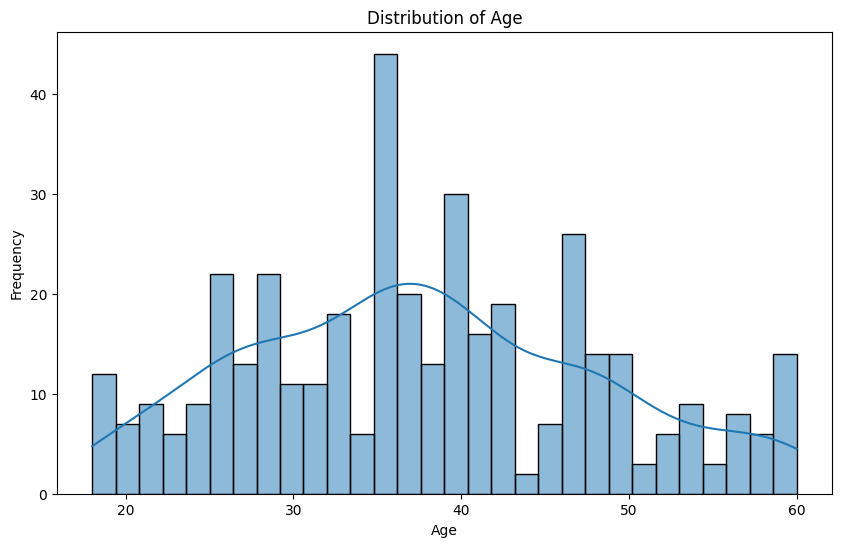

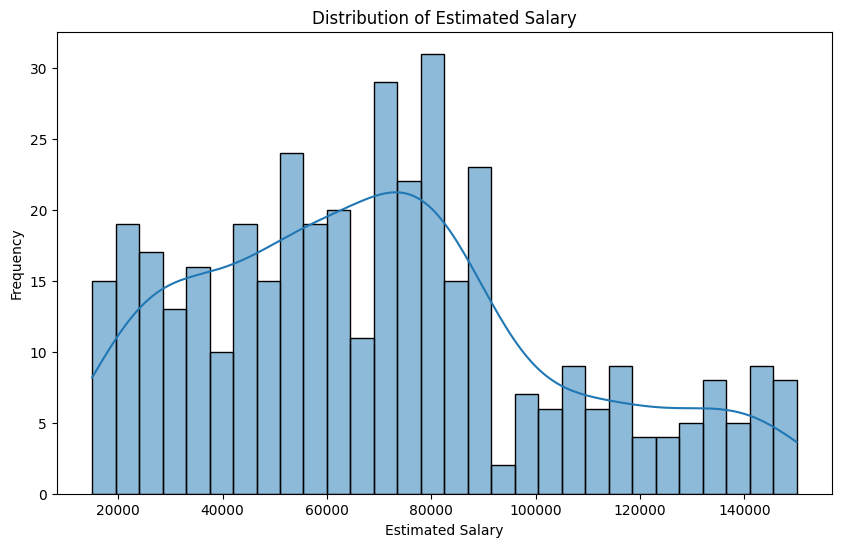

In [4]:
#%%
# Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=True, bins=30)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Distribution of Estimated Salary
plt.figure(figsize=(10, 6))
sns.histplot(df['estimated_salary'], kde=True, bins=30)
plt.title('Distribution of Estimated Salary')
plt.xlabel('Estimated Salary')
plt.ylabel('Frequency')
plt.show()

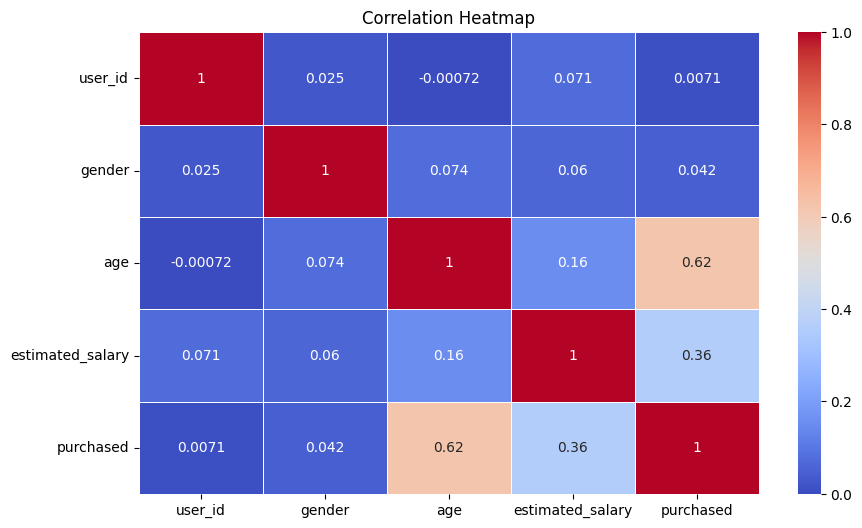

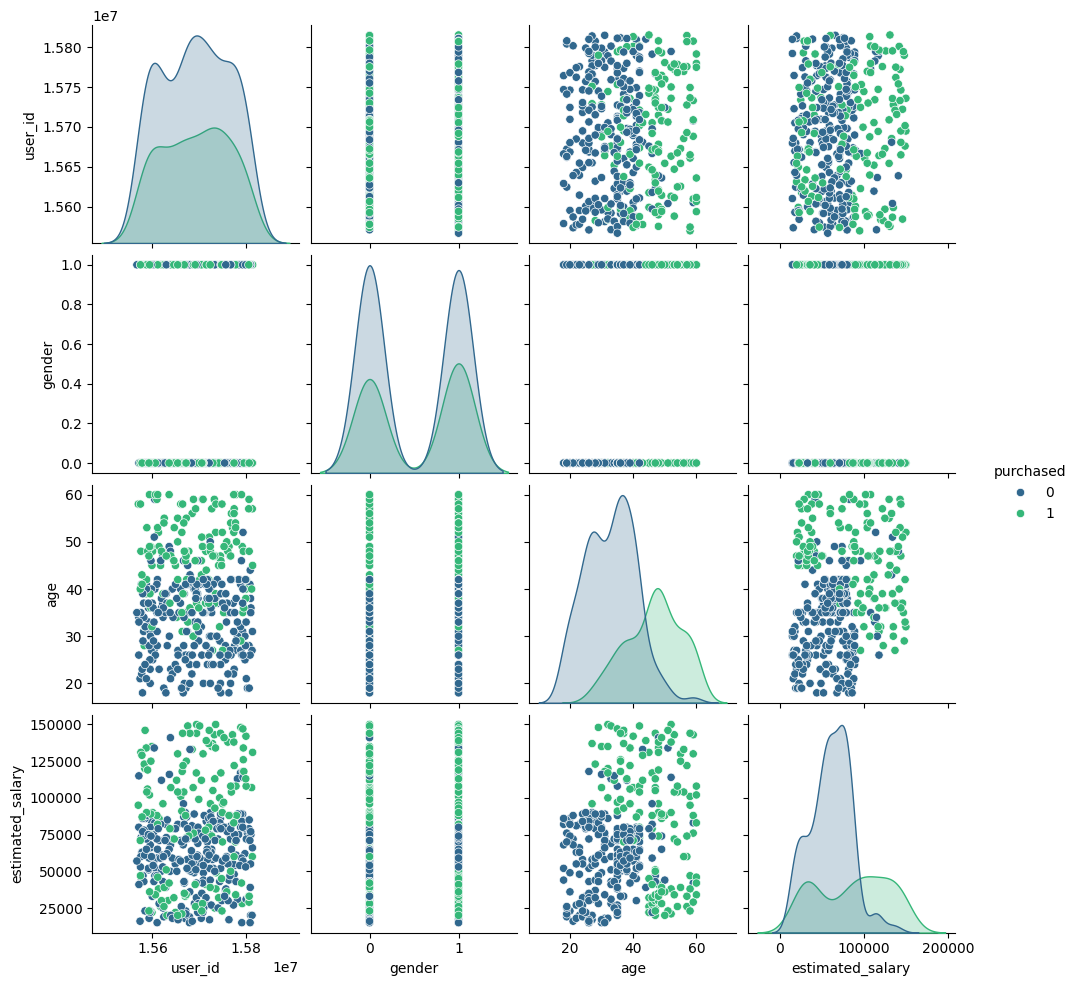

In [5]:
#%%
# Selecting only numeric columns for correlation matrix
numeric_df = df.select_dtypes(include=[float, int])

# Correlation Heatmap
plt.figure(figsize=(10, 6))
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Pairplot
sns.pairplot(df, hue='purchased', palette='viridis')
plt.show()

In [6]:
#%%
# Extracting independent and dependent variables
X = df[['age', 'estimated_salary', 'gender']].values
y = df['purchased'].values

# Output first five values in both the lists
print(X[:5])
print(y[:5])

[[   19 19000     0]
 [   35 20000     0]
 [   26 43000     1]
 [   27 57000     1]
 [   19 76000     0]]
[0 0 0 0 0]


In [7]:
#%%
# Splitting the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [8]:
#%%
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("X_train:", X_train[:5], "...")
print("")
print("X_test:", X_test[:5], "...")

X_train: [[ 0.58164944 -0.88670699  0.98019606]
 [-0.60673761  1.46173768 -1.02020406]
 [-0.01254409 -0.5677824   0.98019606]
 [-0.60673761  1.89663484  0.98019606]
 [ 1.37390747 -1.40858358  0.98019606]] ...

X_test: [[-0.80480212  0.50496393 -1.02020406]
 [-0.01254409 -0.5677824   0.98019606]
 [-0.30964085  0.1570462  -1.02020406]
 [-0.80480212  0.27301877  0.98019606]
 [-0.30964085 -0.5677824   0.98019606]] ...


In [9]:
#%%
# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Log-likelihood function
def compute_log_likelihood(X, y, weights):
    m = len(y)
    h = sigmoid(X @ weights)
    log_likelihood = (1/m) * (y.T @ np.log(h) + (1 - y).T @ np.log(1 - h))
    return log_likelihood

# Gradient ascent
def gradient_ascent(X, y, weights, learning_rate, iterations):
    m = len(y)
    log_likelihood_history = np.zeros(iterations)
    weights_history = []

    for i in range(iterations):
        weights = weights + (learning_rate/m) * (X.T @ (y - sigmoid(X @ weights)))
        log_likelihood_history[i] = compute_log_likelihood(X, y, weights)
        weights_history.append(weights.copy())
        if (i + 1) % 100 == 0:  # Print weights every 100 iterations
            print(f"Iteration {i+1}: Weights = {weights}")

    return weights, log_likelihood_history, weights_history

# Initialize weights
weights = np.zeros(X_train.shape[1])

# Set learning rate and number of iterations
learning_rate = 0.01
iterations = 1000

# Perform gradient ascent
weights, log_likelihood_history, weights_history = gradient_ascent(X_train, y_train, weights, learning_rate, iterations)

Iteration 100: Weights = [0.25286644 0.14800309 0.0225563 ]
Iteration 200: Weights = [0.44872404 0.25863021 0.03508797]
Iteration 300: Weights = [0.60491475 0.34446055 0.04154353]
Iteration 400: Weights = [0.73300864 0.41353281 0.04431509]
Iteration 500: Weights = [0.84050919 0.47081762 0.04482145]
Iteration 600: Weights = [0.93239762 0.51946495 0.0439216 ]
Iteration 700: Weights = [1.01209879 0.56154965 0.04215069]
Iteration 800: Weights = [1.08205042 0.59849279 0.03985093]
Iteration 900: Weights = [1.14404201 0.63130278 0.03724576]
Iteration 1000: Weights = [1.19942293 0.66071798 0.03448315]


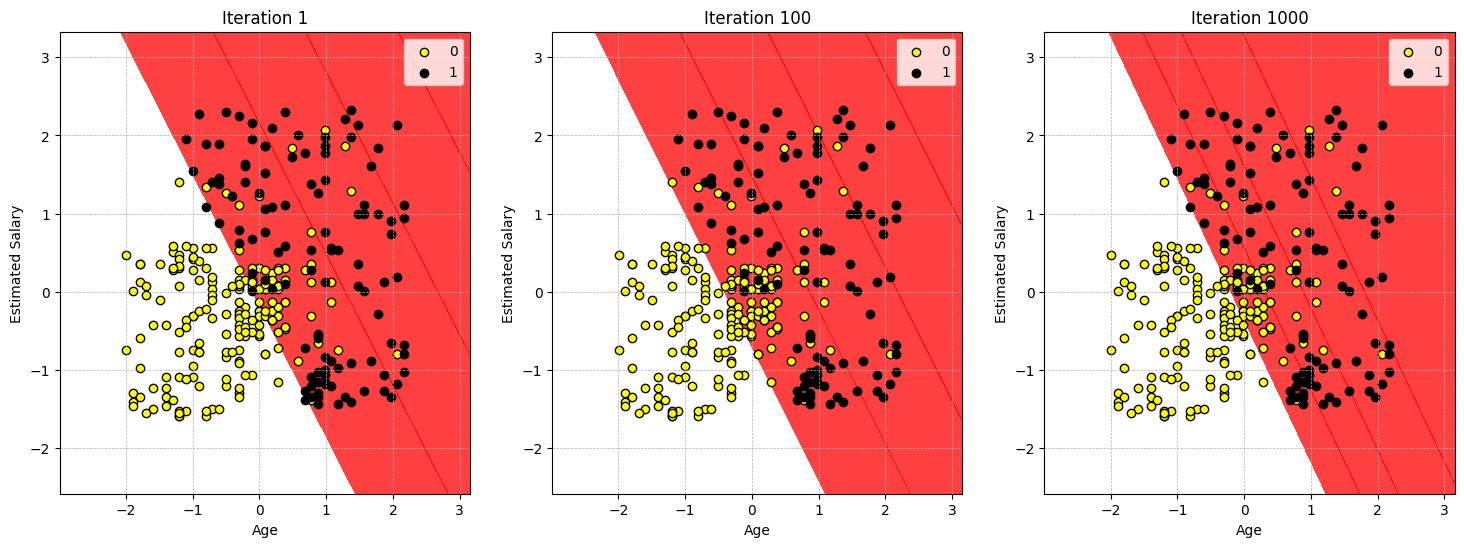

In [11]:
#%%
# Visualize the decision boundary at different iterations
x_set, y_set = X_train, y_train
x1, x2 = np.meshgrid(np.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=x_set[:, 1].min() - 1, stop=x_set[:, 1].max() + 1, step=0.01))

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
iterations_to_plot = [1, 100, 1000]

for idx, ax in enumerate(axes):
    iteration = iterations_to_plot[idx]
    weights = weights_history[iteration - 1]
    Z = sigmoid(np.c_[x1.ravel(), x2.ravel(), np.ones(x1.ravel().shape[0])] @ weights).reshape(x1.shape)
    ax.contourf(x1, x2, Z, alpha=0.75, cmap=ListedColormap(('white', 'red')))
    ax.set_xlim(x1.min(), x1.max())
    ax.set_ylim(x2.min(), x2.max())
    for i, j in enumerate(np.unique(y_set)):
        ax.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c=[ListedColormap(('yellow', 'black'))(i)], label=j, edgecolor='k')
    ax.set_title(f'Iteration {iteration}')
    ax.set_xlabel('Age')
    ax.set_ylabel('Estimated Salary')
    ax.legend()
    ax.grid(True, linestyle='--', linewidth=0.5)

plt.show()

In [12]:
#%%
# Predicting the testing dataset results
y_pred_prob = sigmoid(X_test @ weights)
y_pred = (y_pred_prob >= 0.5).astype(int)
print(y_pred[:10], "...")

[0 0 0 0 0 0 0 1 0 1] ...


In [88]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.89


[[55 13]
 [ 2 30]]


<Axes: >

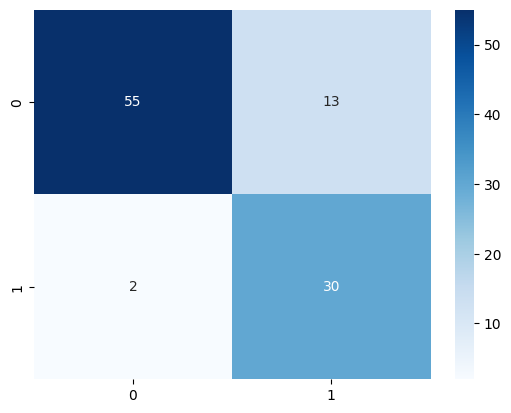

In [13]:
#%%
# Creating the Confusion matrix and heatmap
cm = confusion_matrix(y_test, y_pred)
print(cm)
sns.heatmap(cm, annot=True, cmap="Blues")

In [14]:
#%%
# Calculating accuracy
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.85


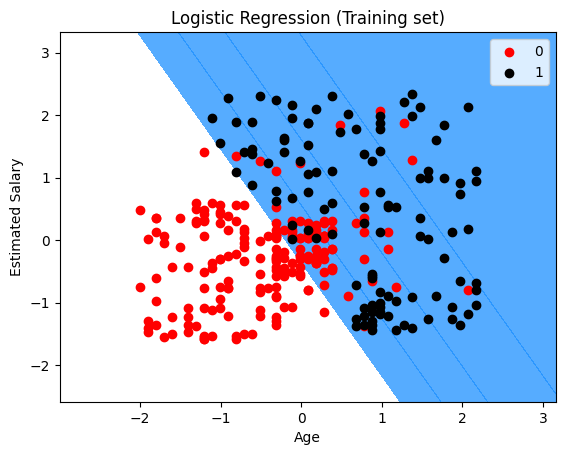

In [16]:
# Visualizing the training set results
x_set, y_set = X_train, y_train
x1, x2 = np.meshgrid(np.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=x_set[:, 1].min() - 1, stop=x_set[:, 1].max() + 1, step=0.01))

plt.contourf(x1, x2, sigmoid(np.c_[x1.ravel(), x2.ravel(), np.ones(x1.ravel().shape[0])] @ weights).reshape(x1.shape),
             alpha=0.75, cmap=ListedColormap(('white', 'dodgerblue')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c=[ListedColormap(('red', 'black'))(i)], label=j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

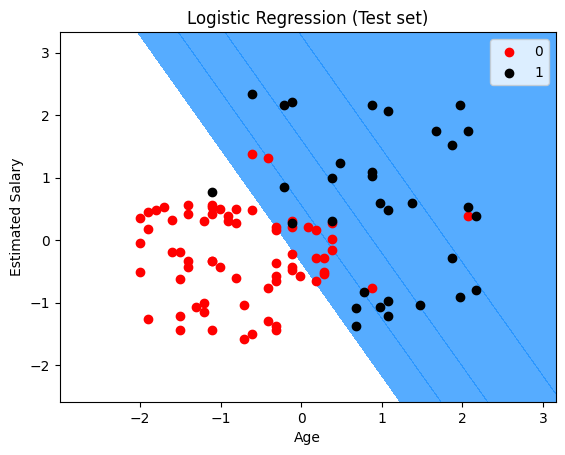

In [18]:
# Visualizing the test set results
x_set, y_set = X_test, y_test
x1, x2 = np.meshgrid(np.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=x_set[:, 1].min() - 1, stop=x_set[:, 1].max() + 1, step=0.01))

plt.contourf(x1, x2, sigmoid(np.c_[x1.ravel(), x2.ravel(), np.ones(x1.ravel().shape[0])] @ weights).reshape(x1.shape),
             alpha=0.75, cmap=ListedColormap(('white', 'dodgerblue')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1], c=[ListedColormap(('red', 'black'))(i)], label=j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

In [22]:
#%%
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression

# Define the model
model = LogisticRegression()

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga']
}

# Implement Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

# Cross-Validation Score
cv_scores = cross_val_score(grid_search.best_estimator_, X, y, cv=10)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())

Best Parameters: {'C': 1, 'solver': 'liblinear'}
Best Score: 0.8266666666666665
Cross-Validation Scores: [0.65  0.65  0.65  0.65  0.65  0.65  0.65  0.625 0.625 0.625]
Mean CV Score: 0.6425000000000001
